In [11]:
# Preprocessing Data

import pandas as pd

# Load the new CSV file to inspect its contents
file_path_csv = '/mnt/data/myexcel (1).csv'
df_csv = pd.read_csv("myexcel (1).csv")

# Display the first few rows to understand the data structure
df_csv.head()

# Replace the "Height" column with random integers between 150 and 180
df_csv['Height'] = np.random.randint(150, 181, size=len(df_csv))

# Verify the replacement
df_csv.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,153,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,154,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,162,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,164,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,150,231,NaN,5000000.0


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("myexcel (1).csv")

1. Distribution of Employees Across Each Team with Percentage Split:
                        Employee_Count  Percentage_Split
Team                                                    
New Orleans Pelicans                19          4.148472
Memphis Grizzlies                   18          3.930131
Utah Jazz                           16          3.493450
New York Knicks                     16          3.493450
Milwaukee Bucks                     16          3.493450
Brooklyn Nets                       15          3.275109
Portland Trail Blazers              15          3.275109
Oklahoma City Thunder               15          3.275109
Denver Nuggets                      15          3.275109
Washington Wizards                  15          3.275109
Miami Heat                          15          3.275109
Charlotte Hornets                   15          3.275109
Atlanta Hawks                       15          3.275109
San Antonio Spurs                   15          3.275109
Houston Rockets    

C:\Users\user\AppData\Local\Temp\ipykernel_14024\2729898175.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, team_distribution[i] + 1, f"{v:.1f}%", ha='center', va='bottom')


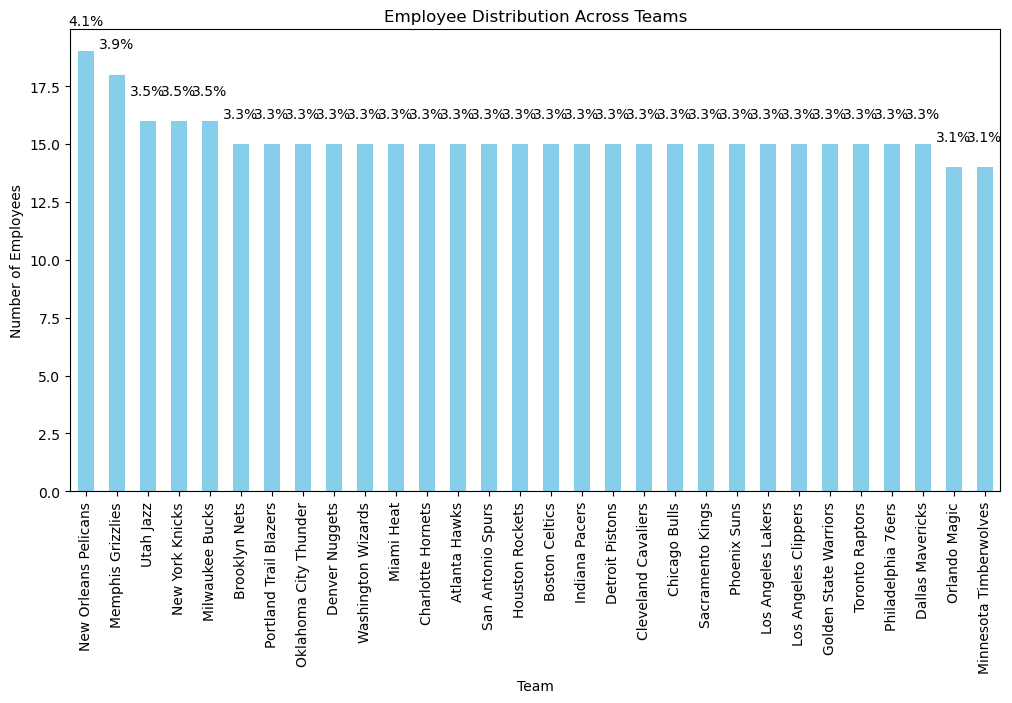

In [32]:
# Question 1

# Calculate team distribution and percentage
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / team_distribution.sum()) * 100

# Create DataFrame for display
team_summary = pd.DataFrame({
    'Employee_Count': team_distribution,
    'Percentage_Split': team_percentage
})

# Display the result
print("1. Distribution of Employees Across Each Team with Percentage Split:")
print(team_summary)

# Bar chart with percentage annotations
plt.figure(figsize=(12, 6))
team_distribution.plot(kind='bar', color='skyblue')
plt.title('Employee Distribution Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
for i, v in enumerate(team_percentage):
    plt.text(i, team_distribution[i] + 1, f"{v:.1f}%", ha='center', va='bottom')
plt.show()


2. Segregation of Employees by Position:
Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


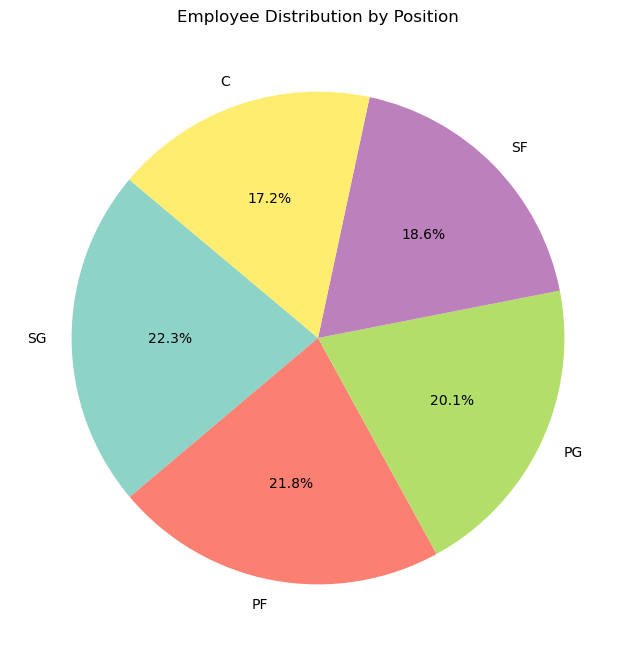

In [34]:
# Question 2

# Calculate position distribution
position_distribution = df['Position'].value_counts()

# Display the result
print("\n2. Segregation of Employees by Position:")
print(position_distribution)

# Pie chart for positions
plt.figure(figsize=(8, 8))
position_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Employee Distribution by Position')
plt.ylabel('')
plt.show()


3. Predominant Age Group Among Employees:
Age_Group
<20        2
20-29    334
30-39    119
40-49      3
50-59      0
60-69      0
70+        0
Name: count, dtype: int64


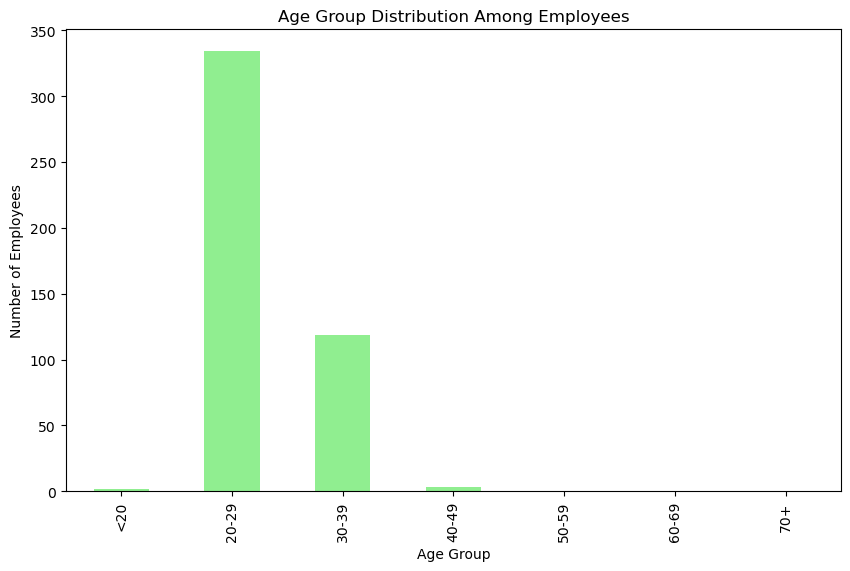

In [36]:
# Question 3

# Define age bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 70, 100]
age_labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]

# Create a new column 'Age_Group' based on the bins
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate age group distribution
age_group_distribution = df['Age_Group'].value_counts().sort_index()

# Display the result
print("\n3. Predominant Age Group Among Employees:")
print(age_group_distribution)

# Histogram for age groups
plt.figure(figsize=(10, 6))
age_group_distribution.plot(kind='bar', color='lightgreen')
plt.title('Age Group Distribution Among Employees')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()


4. Team and Position with Highest Salary Expenditure:
Highest Salary Team: Cleveland Cavaliers - $106,988,689.00
Highest Salary Position: C - $466,377,332.00


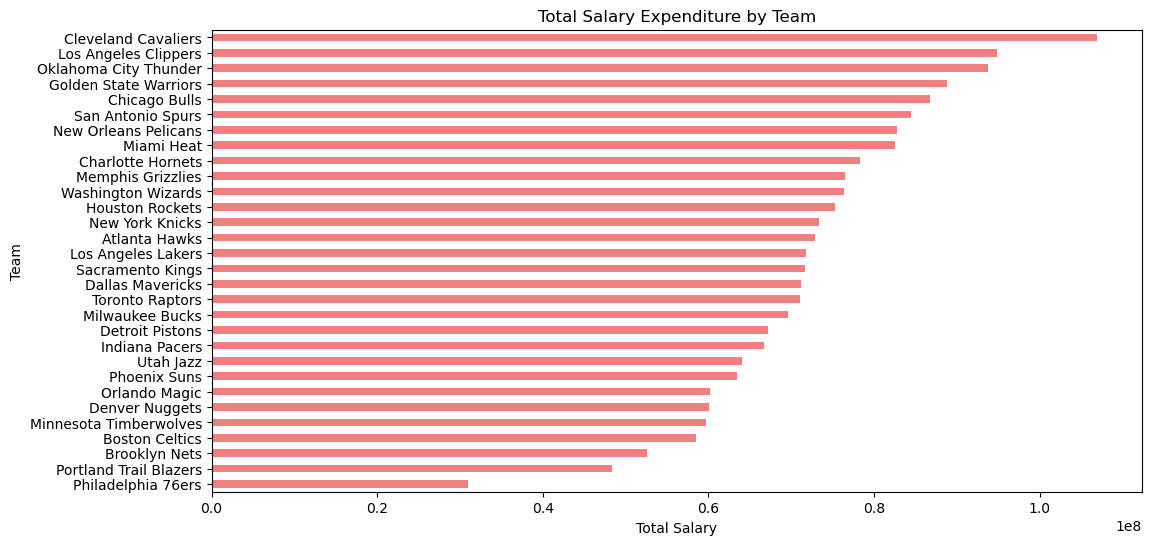

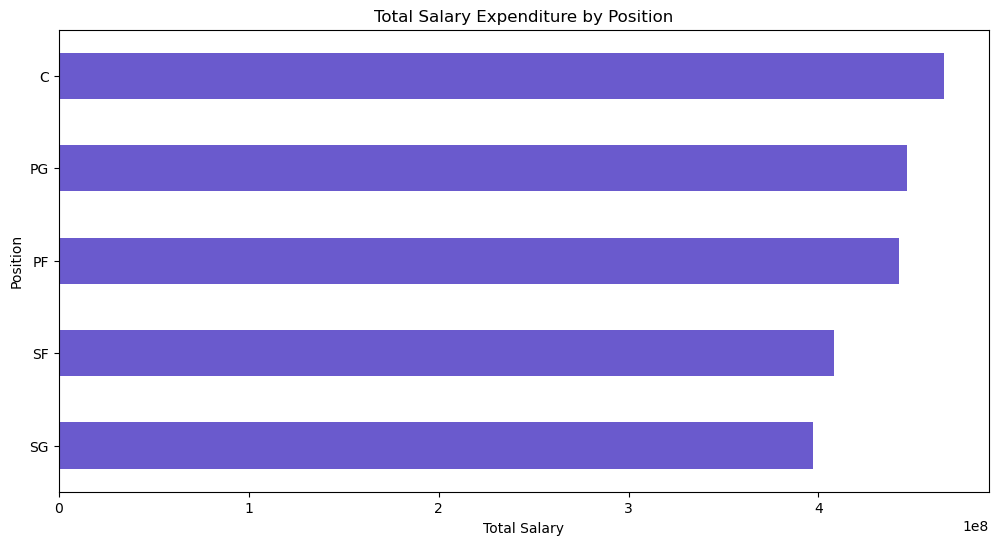

In [38]:
# Question 4

# Ensure Salary has no NaN values (fill with 0)
df['Salary'] = df['Salary'].fillna(0)

# Calculate total salary by team
team_salary = df.groupby('Team')['Salary'].sum().sort_values()

# Calculate total salary by position
position_salary = df.groupby('Position')['Salary'].sum().sort_values()

# Display highest salary expenditure team and position
highest_salary_team = team_salary.idxmax()
highest_salary_position = position_salary.idxmax()
print("\n4. Team and Position with Highest Salary Expenditure:")
print(f"Highest Salary Team: {highest_salary_team} - ${team_salary[highest_salary_team]:,.2f}")
print(f"Highest Salary Position: {highest_salary_position} - ${position_salary[highest_salary_position]:,.2f}")

# Horizontal bar charts for team and position salary expenditure
plt.figure(figsize=(12, 6))
team_salary.plot(kind='barh', color='lightcoral')
plt.title('Total Salary Expenditure by Team')
plt.xlabel('Total Salary')
plt.ylabel('Team')
plt.show()

plt.figure(figsize=(12, 6))
position_salary.plot(kind='barh', color='slateblue')
plt.title('Total Salary Expenditure by Position')
plt.xlabel('Total Salary')
plt.ylabel('Position')
plt.show()


5. Correlation Between Age and Salary:
Correlation Coefficient: 0.21


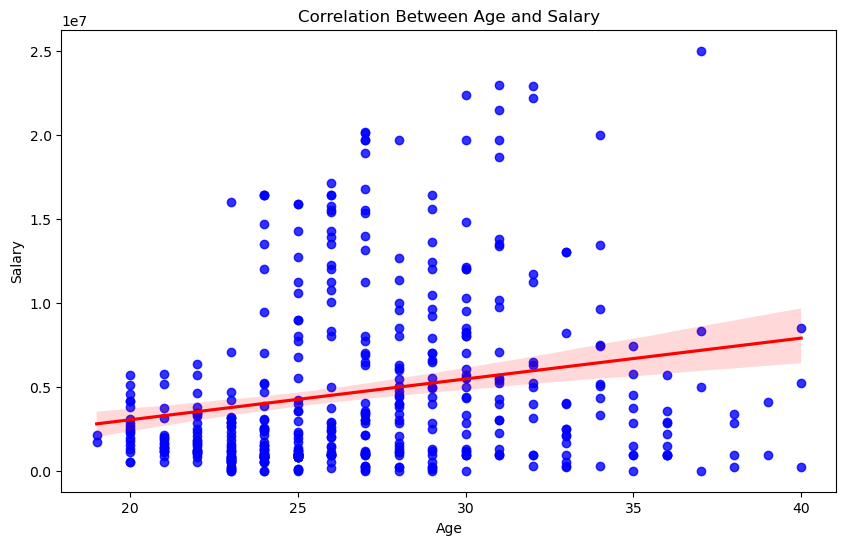

In [40]:
# Question 5

# Calculate correlation coefficient
correlation = df['Age'].corr(df['Salary'])
print("\n5. Correlation Between Age and Salary:")
print(f"Correlation Coefficient: {correlation:.2f}")

# Scatter plot with regression line for age vs salary
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Salary', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()